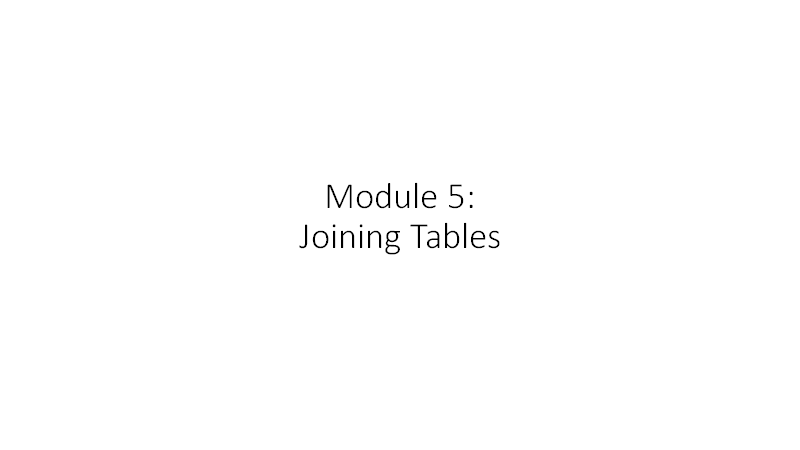

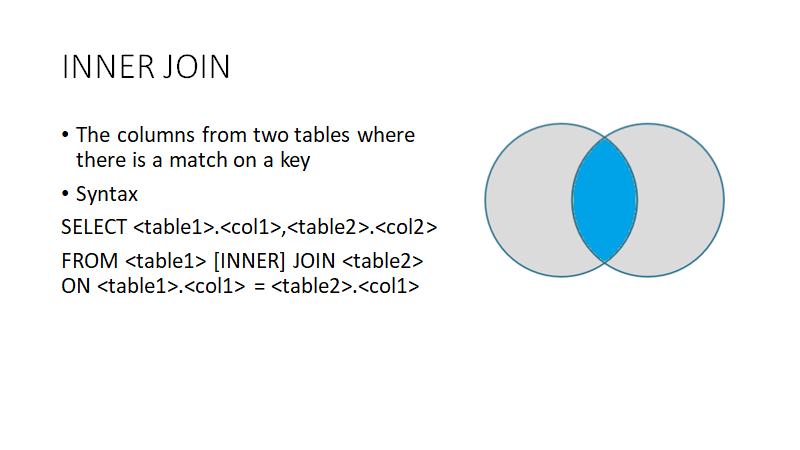

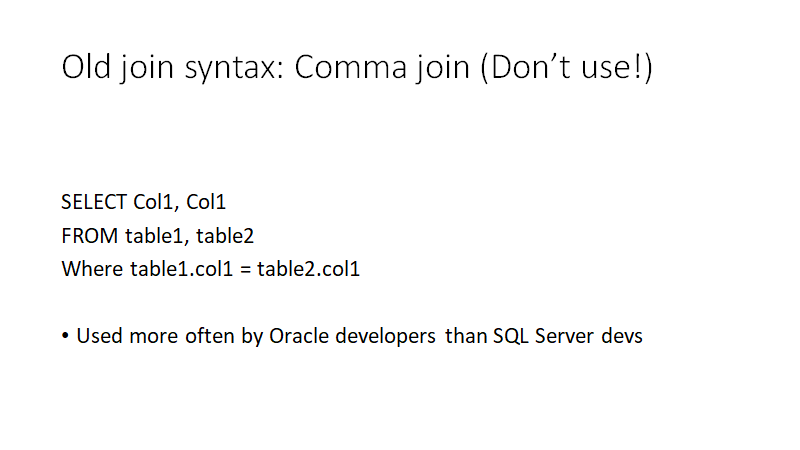

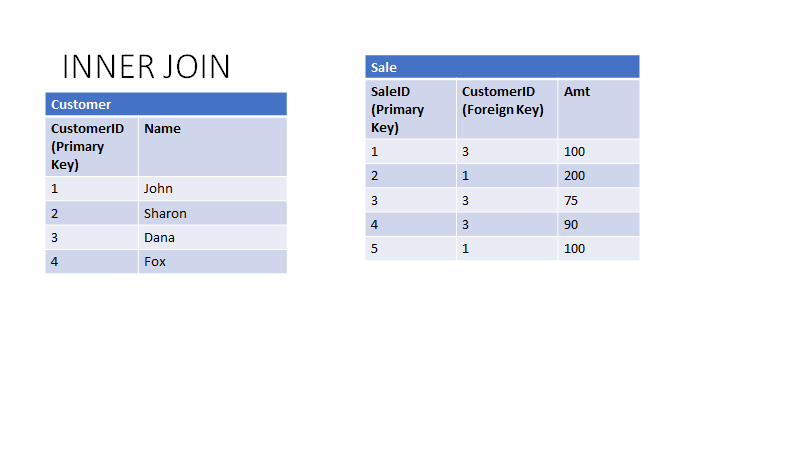

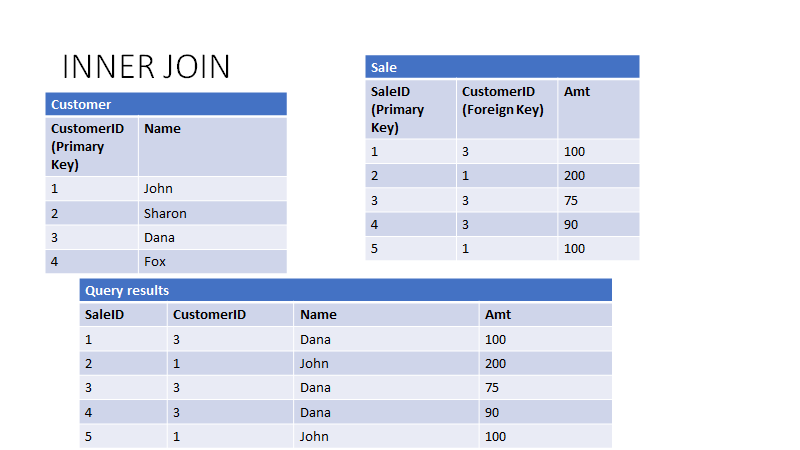

In [ ]:
--Module 5 

--Demo 1
--Joining Two Tables 
SELECT * --31,465
FROM Sales.SalesOrderHeader;

SELECT * --121,317
FROM Sales.SalesOrderDetail;

In [ ]:
SELECT s.SalesOrderID, s.OrderDate, s.TotalDue, d.SalesOrderDetailID,        
	d.ProductID, d.OrderQty    
FROM Sales.SalesOrderHeader AS s    
INNER JOIN Sales.SalesOrderDetail AS d 
ON s.SalesOrderID = d.SalesOrderID; 

In [ ]:
--Writing an Incorrect Query 
--Cartesian Product
SELECT s.SalesOrderID, OrderDate, TotalDue, SalesOrderDetailID,        
	d.ProductID, d.OrderQty    
FROM Sales.SalesOrderHeader AS s    
INNER JOIN Sales.SalesOrderDetail d 
ON 1 = 1;   

In [ ]:
--Wrong results!
SELECT s.SalesOrderID, OrderDate, TotalDue, SalesOrderDetailID,        
	d.ProductID, d.OrderQty    
FROM Sales.SalesOrderHeader AS s    
INNER JOIN Sales.SalesOrderDetail d 
ON s.SalesOrderID = d.SalesOrderDetailID;  

In [ ]:
SELECT s.SalesOrderID, OrderDate, TotalDue, SalesOrderDetailID,        
	d.ProductID, d.OrderQty    
FROM Sales.SalesOrderHeader AS s    
INNER JOIN Sales.SalesOrderDetail d 
ON s.SalesOrderID = d.OrderQty;  


In [ ]:
--Joining Two Tables with Different Column Names 
SELECT c.CustomerID, c.PersonID, p.BusinessEntityID, p.LastName    
FROM Sales.Customer AS c    
INNER JOIN Person.Person AS p ON c.PersonID = p.BusinessEntityID; 

In [ ]:
SELECT * FROM Sales.SpecialOfferProduct
order by ProductID 

select * from sales.SalesOrderDetail

In [ ]:
--Joining Two Columns --54
SELECT sod.SalesOrderID, sod.SalesOrderDetailID,        
	so.ProductID, so.SpecialOfferID, so.ModifiedDate    
FROM Sales.SalesOrderDetail AS sod    
INNER JOIN Sales.SpecialOfferProduct AS so        
	ON so.ProductID = sod.ProductID 
	AND so.SpecialOfferID = sod.SpecialOfferID    
WHERE sod.SalesOrderID IN (51116,51112); 

In [ ]:
--Joining Three Tables 
SELECT soh.SalesOrderID, soh.OrderDate, p.ProductID, p.Name    
FROM Sales.SalesOrderHeader as soh    
INNER JOIN Sales.SalesOrderDetail AS sod ON soh.SalesOrderID = sod.SalesOrderID    
INNER JOIN Production.Product AS p ON sod.ProductID = p.ProductID    
ORDER BY soh.SalesOrderID;   

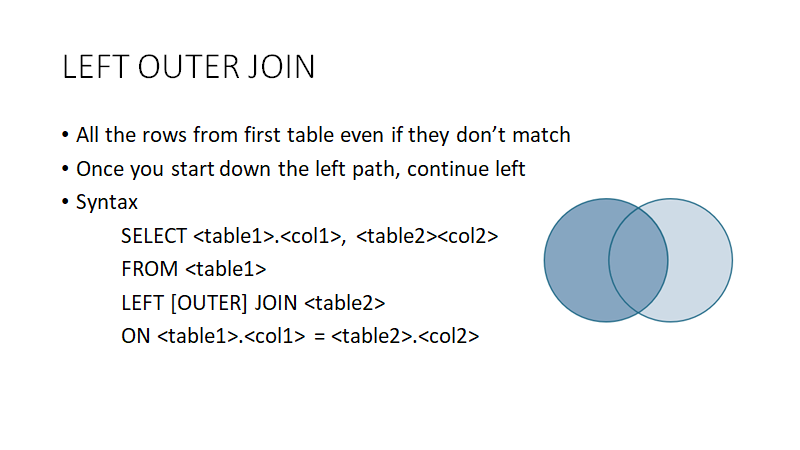

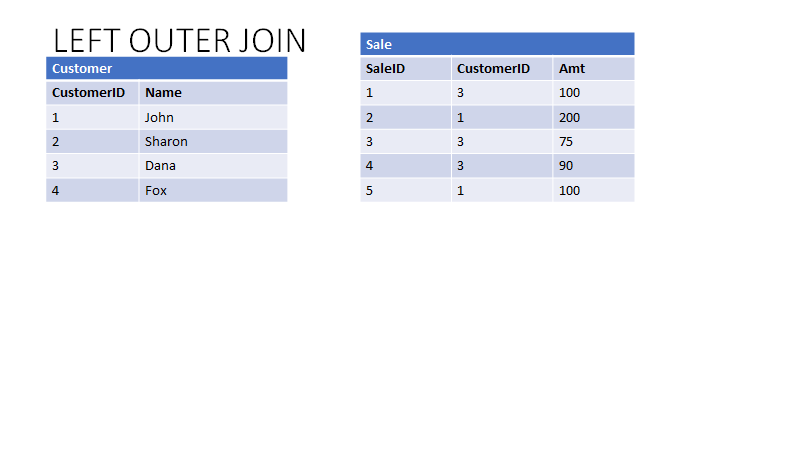

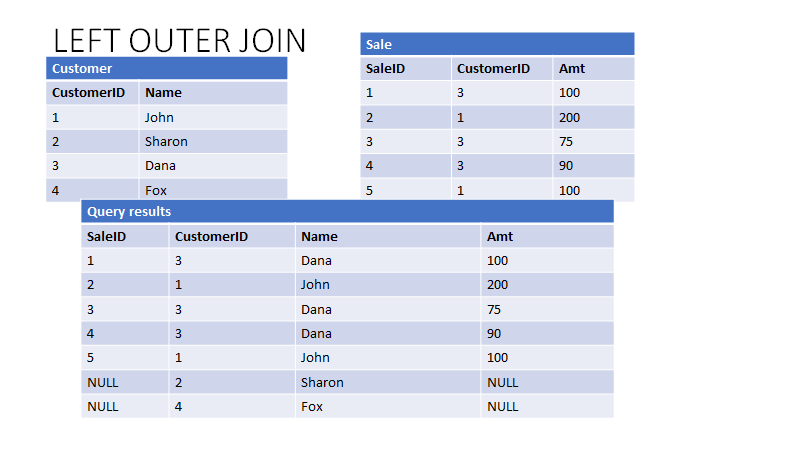

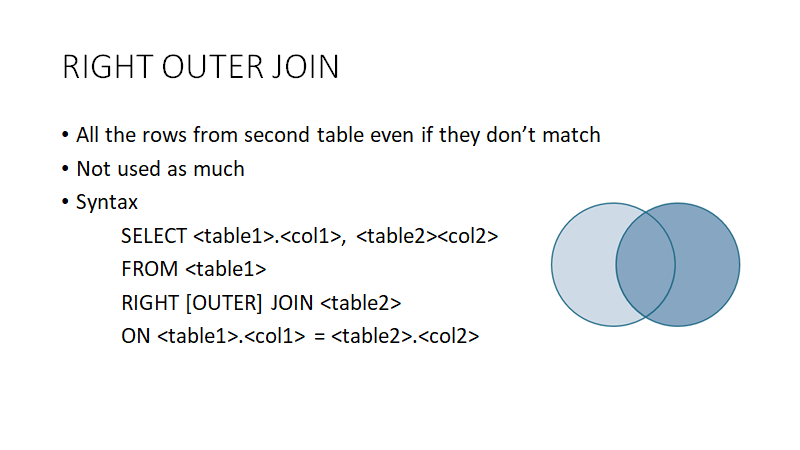

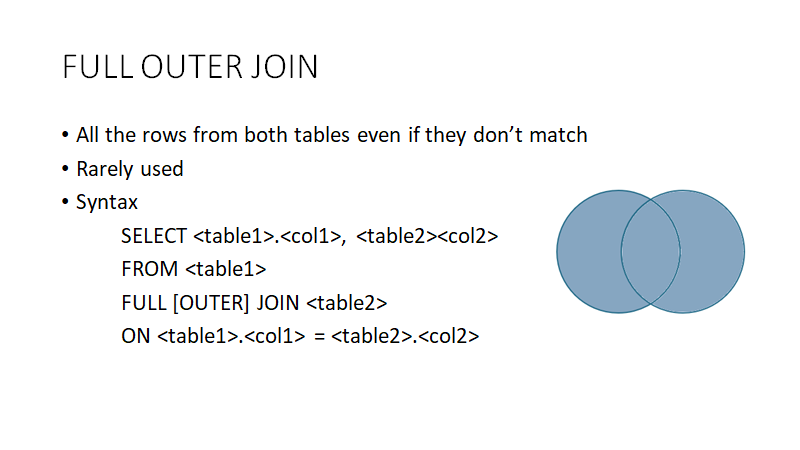

In [ ]:
--Demo 2 OUTER JOIN
--Using LEFT OUTER JOIN 
SELECT * FROM Sales.Customer;
SELECT * FROM Sales.SalesOrderHeader

In [ ]:
--32,166
SELECT c.CustomerID, C.AccountNumber, S.SalesOrderID, s.OrderDate    
FROM Sales.Customer AS c  LEFT OUTER JOIN Sales.SalesOrderHeader AS s ON c.CustomerID = s.CustomerID    
ORDER BY C.CustomerID; 

In [ ]:
--Using RIGHT OUTER JOIN --Not recommended
SELECT c.CustomerID, C.AccountNumber,S.SalesOrderID, s.OrderDate    
FROM Sales.SalesOrderHeader AS s  RIGHT OUTER JOIN Sales.Customer AS c ON c.CustomerID = s.CustomerID    
ORDER BY C.CustomerID;  

In [ ]:
--What happens when you add a second table to a LEFT join?
SELECT C.CustomerID, C.AccountNumber, SOD.SalesOrderID, SOD.SalesOrderDetailID, SOD.ProductID    
FROM Sales.Customer AS C    
LEFT OUTER JOIN Sales.SalesOrderHeader AS SOH ON C.CustomerID = SOH.CustomerID    
INNER JOIN Sales.SalesOrderDetail AS SOD ON SOH.SalesOrderID = SOD.SalesOrderID    
ORDER BY C.CustomerID; 

In [ ]:
--Continue the LEFT path 
SELECT C.CustomerID,C.AccountNumber, SOH.SalesOrderID, SOD.SalesOrderDetailID, SOD.ProductID    
FROM Sales.Customer AS C    
LEFT OUTER JOIN Sales.SalesOrderHeader AS SOH ON C.CustomerID = SOH.CustomerID    
LEFT OUTER JOIN Sales.SalesOrderDetail AS SOD ON SOH.SalesOrderID = SOD.SalesOrderID    
ORDER BY C.CustomerID; 

In [ ]:
CREATE table #ProductColor        
	(Color nvarchar(15) NOT NULL PRIMARY KEY);    
GO    
--Insert most of the existing colors    
INSERT INTO #ProductColor    
SELECT DISTINCT Color    
FROM Production.Product    
WHERE Color IS NOT NULL and Color <> 'Silver';
 
--Insert some additional colors    
INSERT INTO #ProductColor    
VALUES ('Green'),('Orange'),('Purple'); 

SELECT * FROM #ProductColor

In [ ]:
SELECT c.Color AS "Color from list", p.Color, p.ProductID    
FROM Production.Product AS p    
FULL OUTER JOIN #ProductColor AS c ON p.Color = c.Color    
ORDER BY p.ProductID;  

In [ ]:
--Only the exact matches
SELECT c.Color AS "Color from list", p.Color, p.ProductID    
FROM Production.Product AS p    
INNER JOIN Production.ProductColor AS c ON p.Color = c.Color    
ORDER BY p.ProductID;  

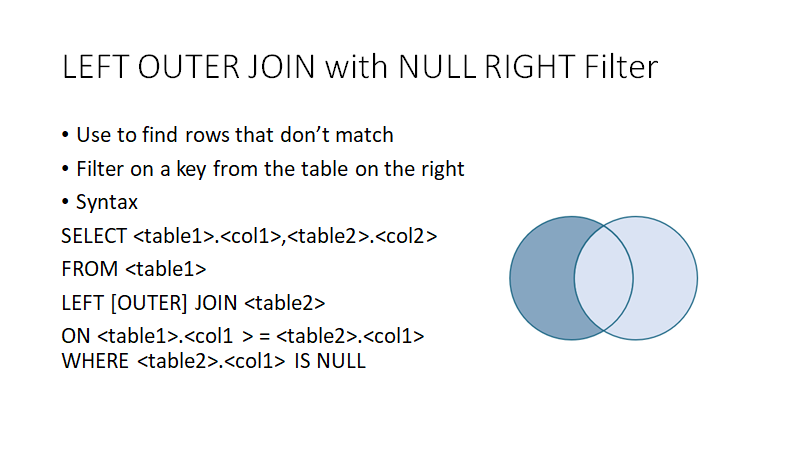

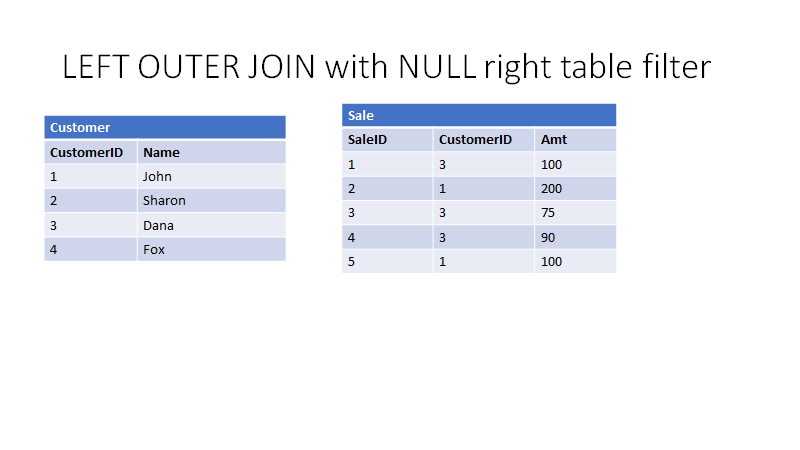

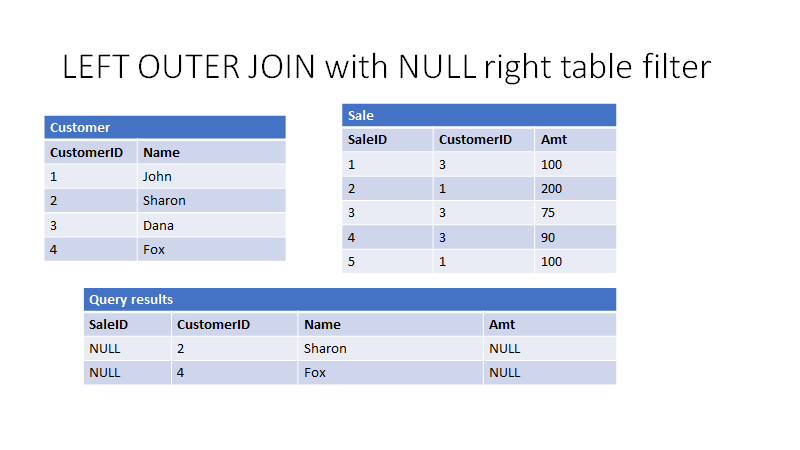

In [ ]:
--Demo 3

--A left join. Lots of customers with no order returned
SELECT c.CustomerID, s.SalesOrderID, s.OrderDate    
FROM Sales.Customer AS c    
LEFT OUTER JOIN Sales.SalesOrderHeader AS s ON c.CustomerID = s.CustomerID 
ORDER BY s.SalesOrderID;

In [ ]:
--Using LEFT OUTER JOIN to Find the Rows with No Matches 
SELECT c.CustomerID, s.SalesOrderID, s.OrderDate    
FROM Sales.Customer AS c    
LEFT OUTER JOIN Sales.SalesOrderHeader AS s ON c.CustomerID = s.CustomerID    
WHERE s.SalesOrderID IS NULL;  

In [ ]:
--231
select * from sales.SalesOrderHeader as s
where S.OrderDate BETWEEN '2011-07-01' AND '2011-07-31'

In [ ]:
SELECT c.CustomerID, s.SalesOrderID, s.OrderDate    
FROM Sales.Customer AS c    
LEFT OUTER JOIN Sales.SalesOrderHeader AS s ON c.CustomerID = s.CustomerID    
WHERE S.OrderDate BETWEEN '2011-07-01' AND '2011-07-31' 
order by s.SalesOrderID ;

In [ ]:
--Add the right filter to the join
SELECT c.CustomerID, s.SalesOrderID, s.OrderDate    
FROM Sales.Customer AS c    
LEFT OUTER JOIN Sales.SalesOrderHeader AS s ON c.CustomerID = s.CustomerID    
	AND S.OrderDate BETWEEN '2011-07-01' AND '2011-07-31'
ORDER BY s.SalesOrderID; 